In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=dataset.iloc[:,[3,4]].values

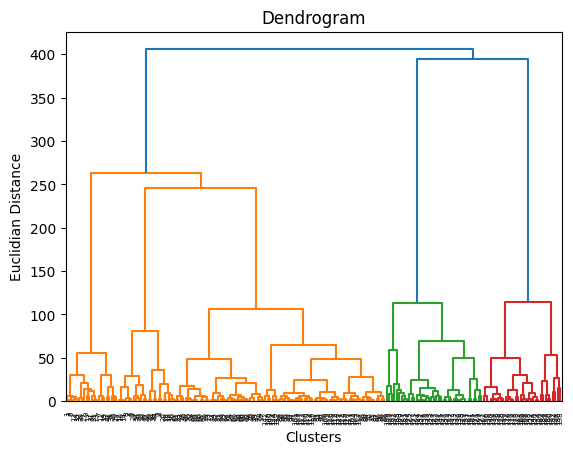

In [4]:
import scipy.cluster.hierarchy as sch
graph=sch.dendrogram(sch.linkage(X,method='ward'))
import matplotlib.pyplot as plt
plt.title("Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidian Distance")
plt.show()

In [5]:
from sklearn.cluster import HDBSCAN
hdbscan=HDBSCAN(min_cluster_size=10, min_samples=3)
hdbscan_predict=hdbscan.fit_predict(X)
# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

In [6]:
supervised=pd.DataFrame(dataset)

In [7]:
supervised['cluster_group']=hdbscan_predict

In [8]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,5
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [9]:
supervised.to_csv("HDBSCAN_cluster.csv",index=False)

In [10]:
supervised['cluster_group'].value_counts()

cluster_group
 4    89
 0    34
-1    23
 5    16
 2    14
 1    12
 3    12
Name: count, dtype: int64

In [11]:
# centroids=spectral.cluster_centers_
# centroids

C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


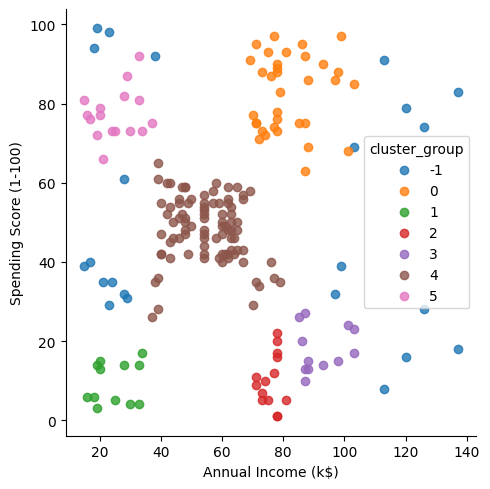

In [12]:
import seaborn as sns
graph=sns.lmplot(data=supervised,
                x=supervised.columns[3],
                y=supervised.columns[4],
                hue=supervised.columns[5],
                fit_reg=False,
                legend=True,
                legend_out=False)